# **16 September 2023**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
path_obes = '/content/obes.xls'

data= pd.read_excel(path_obes, sheet_name="7.2")
data.head(30)

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [ ]:
data.shape

(30, 10)

In [ ]:
# Data ke 0 -4 dan 16 - 30 tidak berguna. Sehingga, dataframe perlu diperbaiki
path_obes = '/content/obes.xls'

data= pd.read_excel(path_obes, sheet_name="7.2", skiprows=[0,1,2,3], skipfooter=16)
data.head(20)

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


**Rename header**. Pada tabel di atas, bari pertama berisi bilangan nan. Namun karena nanti data tersebut akan divisualisasikan, maka perlu menentukan header dari dataframe tersebut.

In [ ]:
# Karena data yang akan digunakan merupakan data time series, maka header akan diubah namanya menjadi "Year"

data.rename(columns={u"Unnamed: 0" : u"Year"}, inplace= True)
data.head(5)


,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [ ]:
# Hapus baris berisi nilai NAN menggunakan dropna
data.dropna(inplace=True)
data


# Kita setting "Year" menjadi index

data.set_index("Year", inplace=True)
data

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


# **Visualisasi awal** => sederhana

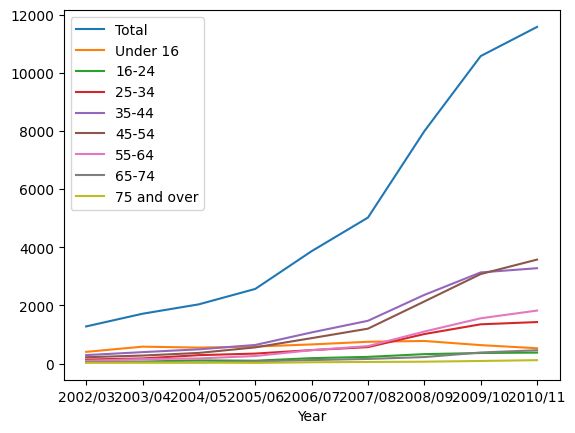

In [ ]:
data.plot()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

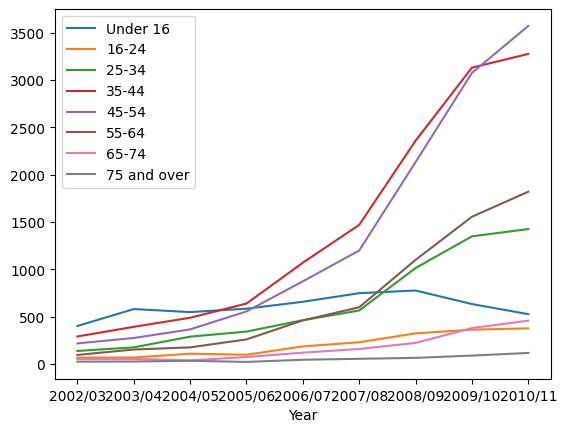

In [ ]:
# Data total akan dihilangkan karena menutupi data-data lainnya

data2=data.drop("Total", axis=1)

data2.plot()

plt.show

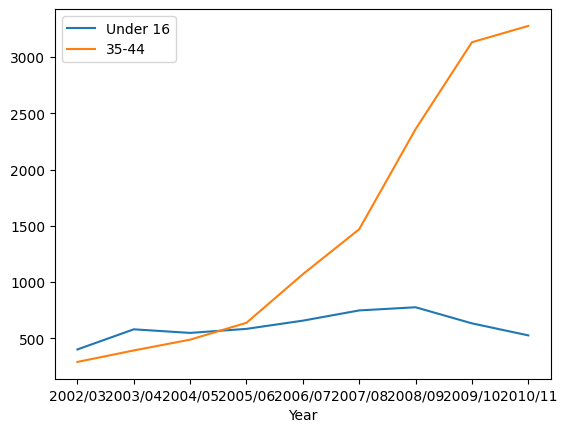

In [ ]:
# Data usia di bawah 16 tahun dan dewasa rentang 35-44 tahun

data["Under 16"].plot(label="Under 16", legend=True)
data["35-44"].plot(label="35-44", legend=True)


plt.show()
